In [1]:
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from PIL import Image

In [2]:
np.random.seed(3)

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

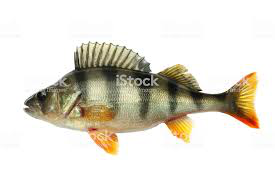

In [4]:
img = load_img('/home/team2/fishgo/training/test/bass/img155.jpg')

data = img_to_array(img)

display(img)

data_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=90,
                                 shear_range=0.5,
                                 width_shift_range=0.1,
                                 zoom_range= 0.3,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')
data = data.reshape((1,) + data.shape)
i = 0
for batch in data_datagen.flow(data,save_to_dir='/home/team2/ag_test', save_prefix='image', save_format='jpg'):
        i += 1
        if i > 10:
            break


In [10]:
data_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=90,
                                 shear_range=0.2,
                                 width_shift_range=0.1,
                                 zoom_range= 0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

filename_in_dir = []
for root, dirs, files in os.walk('/home/team2/fishgo/training/train'):
    files_num = len(files)
    if files_num == 0 :
        continue
    count = (500-files_num)/files_num  
    count = int(count)
    filename_in_dir = []
    for fname in files:
        full_fname = os.path.join(root, fname)
        filename_in_dir.append(full_fname)
    for file_image in filename_in_dir:
        img = load_img(file_image)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in data_datagen.flow(x,save_to_dir=root, save_prefix='img', save_format='jpg'):
            i += 1
            if i > count-1 :
                break 
        